# Biology with Python 

> By Fatih Enes Kemal Ergin

In this small tutorial I will talk about biological concepts with theory and implementation in Python


Before we go into the implementation, we should cover the theoratical side of the biology. This beginning part will be for the programmers who has a little background on biology and to remind them, if you don't know anything about biology you should go to this [post](https://www.biostars.org/p/3066/#3070). If you have good amount of information about the theoratical part of the Biology, you may skip this reminder part and go directly to the implementations...

## Short Biology

Chemicals and molecules are the main constituent of the life, in here we will start examining biology with 3 main molecule structures: __Proteins__, __RNA__, and __DNA__.

### Proteins:
Proteins are the most commonly used in life forms, we may say that with out proteins we would not be different from each other.

- They are sequences made up with 20 different amino acids by _polypeptides_.
- Structure of the protein effects the chemical activity of the body/life directly.
- Most proteins are in 3D structure which gives them an ability to vary their functionality in the life forms.
- Protein structure and it's structure is exceedingly complex and not easy to predict which makes it very good subject to focus on research.
- In computer science we will represent them as letters (20 different) put to gether as a sequence, where each letter represents different amino acids.
- Sequence alco can be represented by the three letter aminoacid code form.
- The amino acids that are linked into a protein chain are often referred to as residues.
- You will see the term residue used when one wants to refer to a particular amino acid in a particular position of a protein chain.
- The process of making a protein by cellular ribosomes, and the information of which amino-acid will go where is coming with another molecule called __RNA__.

### RNA:
RNA is a molecule which has different roles in the cellular program, such as messenger, transfer, ribosomal and much more...

- They made up with small entities called nucleotides.
- Information within RNA comes from DNA
- Not all RNAs are using for protein synthesis, they have also other duties in cell.
- Components of RNA are mostly short-lived copy of DNA


### DNA:
DNA is the information of everything happening inside a life form. It store every feature's information and it's offsprings.

- The regions of DNA which makes the RNA is called genes.
- They made up with also small entities called nucleotides; Adenine(A), Guanine(G), Timine(T), Cytosine.(C)
- A DNA chain is commonly represented as a one-letter sequence 
- DNA sequence is really a representation of a double-stranded molecule which a relation of A-T and G-C
- one long pair of DNA strands inside a cell is called a chromosome.
- Complementary strand is the strand with relational strand from double-stranded DNA 

> ATGACGT is one strand, other is TACTGCA




Now let's talk about some essential concepts that all bioinformatics scientists must know to start their career.

### Transcription
The process of reading DNA and creating RNA from it is called _transcription_. In computation side of it we will only use the same DNA sequence and will replace DNA nucleotide 'T' into 'U'. ```dna.replace('T','U')``` does the job in ```Python``` 

- The DNA strand which has the same sequence as the RNA is called the __coding strand__.

### Translate
Most RNA molecules go on to specify protein amino acid sequences in a process called __translation__; these are called messenger RNAs (mRNA).

- Each subsequent group of _three_ bases, called __codon__.
- The regions of an RNA chain that are removed are called __introns__, and those remaining are called __exons.__
- Introns' presence makes it significantly more difficult to detect which bits of a gene are actually used to make protein sequences.

### DNA Sequencing
Nowadays, sequencing in DNA, RNA, or proteins are coming from DNA, mostly. Since we know how to convert DNA to RNA to Proteins, we don't need every informations, if you know the gene-coding regions. DNA is sequenced with a special kind of chemical reaction, which these days is often performed by a computerised machine.


Now we have some background in biology let's dive into the algorithms and their explanations...


## Using biological sequences in computing

__Here are some important tips:__

- Fit the sequences into some kind of data structures and make sure it will be reusable.
- The Commonest and the simplest is storing your sequence as text
- DNA and RNA will be represented as strings combined with 4 different characters (A, C, G, T/U)
- Proteins have the same style with 20 different characters 
- Representing unusual or artificial amino-acids, prone: 'PRO', hydroxyproline: 'HYP'

### 1. Translating a DNA sequence into protein:
In the first script, we will translate the given DNA sequence into the protein according to pre-defined structures for aa-protein representation. Right now, we won't think of starting codon, stop codon, or special codons, but we will only implement the main concept of the translating...

> I will explain the code with comments...

In [2]:
# Here is the genetic code of the amino acids defined as dictionaries
STANDARD_GENETIC_CODE = {'UUU':'Phe', 'UUC':'Phe', 'UCU':'Ser', 'UCC':'Ser',
                        'UAU':'Tyr', 'UAC':'Tyr', 'UGU':'Cys', 'UGC':'Cys',
                        'UUA':'Leu', 'UCA':'Ser', 'UAA':None, 'UGA':None,
                        'UUG':'Leu', 'UCG':'Ser', 'UAG':None, 'UGG':'Trp',
                        'CUU':'Leu', 'CUC':'Leu', 'CCU':'Pro', 'CCC':'Pro',
                        'CAU':'His', 'CAC':'His', 'CGU':'Arg', 'CGC':'Arg',
                        'CUA':'Leu', 'CUG':'Leu', 'CCA':'Pro', 'CCG':'Pro',
                        'CAA':'Gln', 'CAG':'Gln', 'CGA':'Arg', 'CGG':'Arg',
                        'AUU':'Ile', 'AUC':'Ile', 'ACU':'Thr', 'ACC':'Thr',
                        'AAU':'Asn', 'AAC':'Asn', 'AGU':'Ser', 'AGC':'Ser',
                        'AUA':'Ile', 'ACA':'Thr', 'AAA':'Lys', 'AGA':'Arg',
                        'AUG':'Met', 'ACG':'Thr', 'AAG':'Lys', 'AGG':'Arg',
                        'GUU':'Val', 'GUC':'Val', 'GCU':'Ala', 'GCC':'Ala',
                        'GAU':'Asp', 'GAC':'Asp', 'GGU':'Gly', 'GGC':'Gly',
                        'GUA':'Val', 'GUG':'Val', 'GCA':'Ala', 'GCG':'Ala',
                        'GAA':'Glu', 'GAG':'Glu', 'GGA':'Gly', 'GGG':'Gly'
                        }

# Pre-defined DNA sequence, We will use this along the way.
dnaSeq = 'ATGGTGCATCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTG'

def proteinTranslation(seq, geneticCode):
    """ This function translates a nucleic acid sequence into a
    protein sequence, until the end or until it comes across
    a stop codon """
    # Changes all the T into U, DNA to RNA
    seq = seq.replace('T','U') # Make sure we have RNA sequence
    proteinSeq = [] # Initializing the proteinSeq list to store the output
    
    i = 0
    while i+2 < len(seq):
        # Get codons of three letters
        codon = seq[i:i+3] 
        # Get the match-up aminoacid
        aminoAcid = geneticCode[codon] 
        # If found stop looping
        if aminoAcid is None: # Found stop codon
            break 
        # Other wise add that aminoacid to proteinSeq list
        proteinSeq.append(aminoAcid) 
        i += 3 
    
    return proteinSeq

print proteinTranslation(dnaSeq, STANDARD_GENETIC_CODE)

print ('-'*30)
# You can also directly change DNA to RNA and save it as RNAseq
rnaSeq = dnaSeq.replace('T','U')
print rnaSeq

['Met', 'Val', 'His', 'Leu', 'Thr', 'Pro', 'Glu', 'Glu', 'Lys', 'Ser', 'Ala', 'Val', 'Thr', 'Ala', 'Leu', 'Trp', 'Gly', 'Lys', 'Val']
------------------------------
AUGGUGCAUCUGACUCCUGAGGAGAAGUCUGCCGUUACUGCCCUGUGGGGCAAGGUG


## 2. Estimating the Molecular Mass:
This next script estimates the mass of a DNA, RNA or protein molecule (in units of daltons). This is only an estimate because various residues reversibly bind hydrogen ions under different conditions (i.e. pH affects whether ```H+``` ions are joined to the acidic and basic sites) and we are assuming standard proportions of the various isotopes.

__Steps:__

- Define a function with 2 arguments, sequence, and MoleculeType 
- Define a dictionary inside the function that stores the average molecular weights of the different kinds of residue
- Define a variable to hold the total for the molecular mass

In [3]:
# Define function with seq and molType Protein
def estimateMolMass(seq, molType='protein'):
    """Calculate the molecular weight of a biological sequence assuming
    normal isotopic ratios and protonation/modification states
    """
    # Define a function with Molecule Masses 
    residueMasses = {
                    "DNA": {"G":329.21, "C":289.18, "A":323.21, "T":304.19},
                    "RNA": {"G":345.21, "C":305.18, "A":329.21, "U":302.16},
                    "protein": {"A": 71.07, "R":156.18, "N":114.08, "D":115.08,
                                "C":103.10, "Q":128.13, "E":129.11, "G": 57.05,
                                "H":137.14, "I":113.15, "L":113.15, "K":128.17,
                                "M":131.19, "F":147.17, "P": 97.11, "S": 87.07,
                                "T":101.10, "W":186.20, "Y":163.17, "V": 99.13}}
    
    # Get the molType from the dictionary residueMasses
    massDict = residueMasses[molType]
    # Begin with mass of extra end atoms H + OH
    molMass = 18.02
    
    # Loop through each letter in sequence 
    for letter in seq:
        # Add the molecule mass according to match-up and sum them up
        molMass += massDict.get(letter, 0.0)
    # Return to molMass
    return molMass

# Test Case 1
proteinSeq = 'IRTNGTHMQPLLKLMKFQKFLLELFTLQKRKPEKGYNLPIISLNQ' # Protein Sequence is defined
print estimateMolMass(proteinSeq) # function called with proteinSeq variable and default value protein

# Test Case 2 
print estimateMolMass(dnaSeq, molType='DNA') # function called with dnaSeq variable and DNA molType

5370.18
17852.32


## 3. Finding a Sequence Motif
The next example script is designed to find a particular smaller sub-sequence within a larger sequence. This kind of operation is useful because specific small sequences, called motifs, often have important biological roles.

Here is simple example of how to find a fixed sub-sequence within a larger sequence:

```Python
seq = 'AGCTCGCTCGCTGCGTATAAAATCGCATCGCGCGCAGC'
position1 = seq.find('TATAAA')
position2 = seq.find('GAGGAG')
```
In many cases, however, it is not just one single well-defined sub-sequence that corresponds to a motif with a biological function.

This particular example attempts to find the region of a DNA sequence called the ‘TATA box’. The biological role of this sequence is to help define where the start of a gene is. Note that only some genes use the TATA box system.


In [4]:
profile = {
            'A':[ 61, 16,352, 3,354,268,360,222,155, 56, 83, 82, 82, 68, 77],
            'C':[145, 46, 0, 10, 0, 0, 3, 2, 44,135,147,127,118,107,101],
            'G':[152, 18, 2, 2, 5, 0, 10, 44,157,150,128,128,128,139,140],
            'T':[ 31,309, 35,374, 30,121, 6,121, 33, 48, 31, 52, 61, 75, 71]}

def matchDnaProfile(seq, profile):
    """ Find the best-matching position and score when comparing a DNA
    sequence with a DNA sequence profile """
    bestScore = 0 # Just to start with
    bestPosition = None # Just to start with
    
    width = len(profile['A'])
    for i in range(len(seq)-width):
        score = 0
        for j in range(width):
            letter = seq[i+j]
            score += profile[letter][j]
        if score > bestScore:
            bestScore = score
            bestPosition = i
    return bestScore, bestPosition

# Test Case 1
score, position = matchDnaProfile(dnaSeq, profile)
print(score, position, dnaSeq[position:position+15])

(1952, 20, 'GGAGAAGTCTGCCGT')


## 4. GC Content
The next example investigates a DNA sequence by measuring its GC content: i.e. the percentage of the total base pairs that are G:C (rather than A:T). All we need to do for this is to take the sequence of one strand of DNA and simply count how many of the nucleotides are G or C.


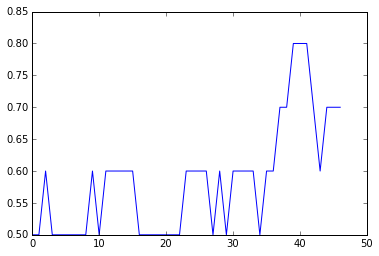

In [5]:
%matplotlib inline
# Define a function with sequence and window Size of 10
def calcGcContent(seq, winSize=10):
    gcValues = [] # Initializing the gcValues
    for i in range(len(seq)-winSize): 
        subSeq = seq[i:i+winSize] # Slice subsequence with starting point i to i+windowsSize
        numGc = subSeq.count('G') + subSeq.count('C') # Calculate G and C numbers inside the subSeq
        value = numGc/float(winSize) # Get the GC rate by dividing it into winSize
        gcValues.append(value) # Add the value found to gcValues
    return gcValues # Return the gcValues list

# Test Case 1
from matplotlib import pyplot # Call the plotting library
gcResults = calcGcContent(dnaSeq) # get the result from function above and save result to gcResults
pyplot.plot(gcResults) # plot it
pyplot.show() # Show it

## 5. Protein hydrophobicity plot
Now we will move on to another example which produces data which we can display as a graph, but this time it will be for a protein sequence. The task here is to generate a plot of how water-hating, or to use the proper term hydrophobic, a given stretch of residues is.

The next example function aims to predict whether a protein possesses a sufficiently hydrophobic segment of residues (which will fold into a helix) that will allow it to be inserted into a cell’s system of membranes. 

Initially we define a hydrophobicity scale, then we define the function that will perform the search so that it accepts a protein sequence and hydrophobicity scale dictionary as mandatory inputs, and an optional input to specify a search window size.

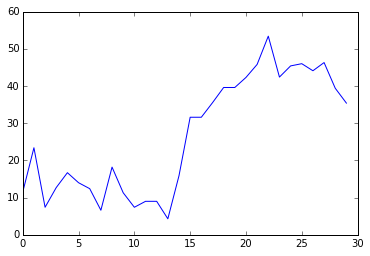

In [6]:
%matplotlib inline
# Defining a scale of hydrophobicity
GES_SCALE = {'F':-3.7,'M':-3.4,'I':-3.1,'L':-2.8,'V':-2.6,
            'C':-2.0,'W':-1.9,'A':-1.6,'T':-1.2,'G':-1.0,
            'S':-0.6,'P': 0.2,'Y': 0.7,'H': 3.0,'Q': 4.1,
            'N': 4.8,'E': 8.2,'K': 8.8,'D': 9.2,'R':12.3}

# Define a function to scan a protein sequence
def hydrophobicitySearch(seq, scale, winSize=15):
    """Scan a protein sequence for hydrophobic regions using the GES
    hydrophobicity scale.
    """
    # Initialize score to None
    score = None
    # Initialize an empty scoreList 
    scoreList = []
    # Loop through sequence
    for i in range(len(seq)- winSize):
        # 
        j = i + winSize
        if score is None:
            score = 0
            for k in range(i,j):
                score += scale[seq[k]]
        else:
            score += scale[seq[j-1]]
            score -= scale[seq[i-1]]
        
        scoreList.append(score)
    return scoreList

# Test Case 1
from matplotlib import pyplot
scores = hydrophobicitySearch(proteinSeq, GES_SCALE)
pyplot.plot(scores)
pyplot.show()

## 6. Measuring Repetitiveness
We will refer to the formulation we use for this comparative measure of repetitiveness as the relative entropy, also known as the Kullback-Leibler divergence.

The actual example code will be broken up into two separate functions; one will calculate the relative entropy and the other will scan through a sequence compiling the results.

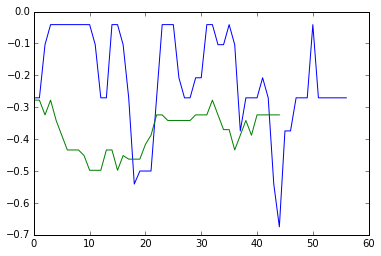

In [7]:
%matplotlib inline
def calcRelativeEntropy(seq, resCodes):
    """Calculate a relative entropy value for the residues in a
    sequence compared to a uniform null hypothesis.
    """
    from math import log
    N = float(len(seq))
    base = 1.0/len(resCodes)
    prop = {}
    for r in resCodes:
        prop[r] = 0
    for r in seq:
        prop[r] += 1
    for r in resCodes:
        prop[r] /= N
    
    H = 0
    for r in resCodes:
        if prop[r] != 0.0:
            h = prop[r]* log(prop[r]/base, 2.0)
            H += h
    
    H /= log(base, 2.0)
    return H

def relativeEntropySearch(seq, winSize, isProtein=False):
    """Scan a sequence for repetitiveness by calculating relative
    information entropy.
    """
    lenSeq = len(seq)
    scores = [0.0] * lenSeq
    extraSeq = seq[:winSize]
    seq += extraSeq
    if isProtein:
        resCodes = 'ACDEFGHIKLMNPQRSTVWY'
    else:
        resCodes = 'GCAT'
    for i in range(lenSeq):
        subSeq = seq[i:i+winSize]
        scores[i] = calcRelativeEntropy(subSeq, resCodes)
    
    return scores

# Test Case 1
from matplotlib import pyplot
dnaScores = relativeEntropySearch(dnaSeq, 6)
proteinScores = relativeEntropySearch(proteinSeq, 10, isProtein=True)
pyplot.plot(dnaScores)
pyplot.plot(proteinScores)
pyplot.show()

## 7. Protein Isoelectric Point
This is an example that involves an optimisation.

It is commonplace to come across problems where the values we are interested in are not directly accessible.

The topic of this example is the estimation of the isoelectric point of a protein, which we will call the ```pI```. This is a measurable property of a protein: it is the ```pH``` at which the protein carries no overall electric charge.

To calculate the ```pI``` we must find the ```pH``` where we think the positive and negative charges in the protein balance, hence must first have a method for estimating the charge of a protein chain at a given ```pH.```

The optimisation algorithm we will use employs a divide-and-conquer strategy. We test various ```pH``` values by stepping between test points and for a given ```pH``` value and whether the resulting charge is above or below zero (positive or negative) tells us in which direction we must search next for a better answer. Also, if we come across a better guess for the ```pI``` (i.e. a ```pH``` that predicts a charge closer to zero) then we reduce the step size (how far to go for the next guess) by half so that we get increasingly close to the optimum value and don’t overshoot far.

The function ```estimateCharge``` is designed to estimate the charge of a given sequence at a given ```pH```. The function takes two input variables which are helpfully named and returns a single charge value.



In [8]:
def estimateCharge(sequence, pH):
    """Using pKa values estimate the charge of a sequence of
    amino acids at a given pH"""
    
    pKaDict = {'+': 8.0,'-': 3.1,'K':10.0,'R':12.0,
                'H': 6.5,'E': 4.4,'D': 4.4,'Y':10.0,'C': 8.5}
    isAcid = {'+':False,'-':True,'K':False,'R':False,
                'H':False,'E':True,'D':True,'Y':True,'C':True}
    total = 0.0
    for aminoAcid in sequence:
        pKa = pKaDict.get(aminoAcid)
        
        if pKa is not None:
            r = 10.0 ** (pH-pKa)
            dissociated = r/(r+1.0)
            
            if isAcid[aminoAcid]:
                charge = -1.0 * dissociated
            else:
                charge = 1.0 - dissociated
            
            total += charge
    return total

The ```estimateIsoelectric``` function uses the ```estimateCharge``` function defined above to estimate the ```pH``` at which a protein sequence will be neutrally charged. To the input sequence of letters we add the + and - symbols to represent the charge groups at the _N_ and _C_ termini (strictly speaking these don’t have to be at the ends because order is unimportant).




In [9]:
def estimateIsoelectric(sequence):
    """Estimate the charge neutral pH of a protein sequence.
    This is just a guess as pKa values will vary according to
    protein sequence, conformation and conditions.
    """
    sequence = '+' + sequence + '-' # assumes seq is a string
    bestValue = 0.0
    minCharge = estimateCharge(sequence, bestValue)
    increment = 7.0
    while abs(minCharge) > 0.001:
        pHtest = bestValue + increment
        charge = estimateCharge(sequence, pHtest)
        
        if abs(charge) < abs(minCharge):
            minCharge = charge
            bestValue = pHtest
        else:
            increment = abs(increment)/2.0
            if minCharge < 0.0:
                increment *= -1
                
    return bestValue

# Test Case1
pI = estimateIsoelectric(proteinSeq)
pI

10.3846435546875

## Obtaining Sequences with BioPython 
You will naturally want to get your sequences from a database or file where they are stored, rather than having to type sequence letters into a Python file, if you want to use some algorithms from above...

There are a lot of tools on bioinformatics but we mostly use and rely on ```BioPython```, since it has a lot of methods to use it.

### Reading and Writing FASTA files
To read a ```FASTA```-format file using ```BioPython``` we use the ```SeqIO``` module, which in this case takes an open file object and extracts each sequence of the file, in turn creating a special object for each record.

In [10]:
# Calling the BioPython library and it's sub-library SeqIO
from Bio import SeqIO
# Opening and reading the fasta file, store them in fileObj.
fileObj = open("sequence.fasta", "rU")
# Loop through in fileObj and parse it in each iteration
for protein in SeqIO.parse(fileObj, 'fasta'):
    # Print the id of the sequence
    print(protein.id)
    # Print the sequence itself
    print(protein.seq)
    # Print the Isoelectric point of the seq
    print(estimateIsoelectric(protein.seq))

# We should close the file object after using it!
fileObj.close()


gi|15826865:265213-265815
GTGAGTCAGCTTTCCTTCTTCACGGCCGAGTCGCTACTCCCCGCAATAGCCGATCTTGCCGGTGTGCTGGCGGCTTCCGGCCAGATCGTGGTGGTTAGCGCTTCTGGTCAAAGTCCCGCCCCGGCCGCTCGGCTTTCGGTAGTGGTAGATCAGCTCTGGCGTGCCTCGGCGCTGGCCGAGATGATTAGCGAGGCTGGTTTGGTACCCGAGATTTCTCGGACTGAGGAAGACACTCCGCTGGTCAGGACGGCGGTGGACCCGTTGTTGTGTCCGATCGCCGCCGAATGGACACGCGGCGCGGTGAAGACGGTGCCCCCGCGATGGTTGCCCGGGCCGCGCGAGCTGCGCGCGTGGATTTTGGCGGCCGGCGTCCCGGAGGCCGCCAACCGTTACCTGCTGGGTCTAGATCCGCACGCACCCGATACCCACTCACCGTTGGCGTCAGCTCTGATGCGGGTCGGAATTGCGCCCACCCTAATCGGCACCCGCAGTGGTCGACCGGCGCTTCGGATCAGCGGCCGTCGTAGGCTATCGCGCCTGTTAGAAAACGTTGGGGAACCTCCCGACTGGGCCGAGGCGTTAGCGTTGTGGCCGCGGGTTTAG
4.6484375


Writing a ```FASTA``` file using ```BioPython``` is slightly trickier because we have to first create the right type of ```BioPython``` objects (```SeqRecord```), which we then pass into a function for writing. 

We make several more imports from the ```BioPython``` library. The ```SeqRecord``` is the final object we wish to make, and which will be written out. The ```Seq``` object is needed internally to make a ```SeqRecord``` and ```IUPAC``` is needed to check the sequence letters according to some (the ```IUPAC```) standard.



In [12]:
from Bio.SeqRecord import SeqRecord # SeqRecord to make right type of object
from Bio.Seq import Seq # To use seq methods
from Bio.Alphabet import IUPAC # 

# Will create an output file and write it as output.fasta
fileObj = open("output.fasta", "w")

# Make a Seq with accepting only 1 protein character according to IUPAC 
seqObj = Seq(proteinSeq, IUPAC.protein)

# Add id to the sequence "Test"
proteinObj = SeqRecord(seqObj, id="TEST")

# Writing the sequences into defined format
SeqIO.write([proteinObj,], fileObj, 'fasta')
# Close the fileObj
fileObj.close()

## Accessing Public Databases
Sometimes, we wish to get data directly from a database then there are a few helper functions in BioPython that allow easy access to some large sequence databases via Internet-based services, rather than having to talk to the database directly.

Here is the example to extract FASTA files from NCBI's GenBank database;

- import the Entrez module
- set the email address attribute (to identify ourselves, as encouraged by the database
- call a function to fetch a given entry based on a given database type “protein”, return format type “fasta” and sequence identifier number



In [16]:
from Bio import Entrez # Importing the library to use Entrez
Entrez.email = 'eneskemalergin@gmail.com' # Defining email for NCBI
# fetch the data from database:protein, typeofdata:fasta, and id 
socketObj = Entrez.efetch(db="protein", rettype="fasta", id="71066805") # fetch the data from database: protein type
# Read it with SeqIO and save the fasta into dnaObj
dnaObj = SeqIO.read(socketObj, "fasta")
# close the socketObj
socketObj.close()
# show the fetched sequence description
print(dnaObj.description)
# show the fetched sequence itself
print(dnaObj.seq)

gi|71066805|gb|DQ091202.1| Elephas maximus HBB/D gene, complete cds
TTCTGGGCCTCAGTTTCCTCATTTGTATAATAACAGAATTGGAGAGTAAATTCTTAAGAGGCTTACCAGGCTGTAATTCTAAAAAAAATGCATAAATAAACTTGCCAAGGCAGATGTTTTTAGCAGCAATTCCTGAAAGAAACGGGACCAGGAGATAAGTAGAGAAAGAGTGAAGGTCTGAAATCAAACTAATAAGACAGTCCCAGACTGTCAAGGAGAGGTATGGCTGTCATCATTCAGGCCTCACCCTGCAGAACCACACCCTGGCCTTGGCCAATCTGCTCACAAGAGCAAAAAGGGCAGGACCAGGGTTGGGCATATAAGGAAGAGTAGTGCCAGCTGCTGTTTACACTCACTTCTGACACAACTGTGTTGACTAGCAACTACCCAATCAGACACCATGGTGAATCTGACTGCTGCTGAGAAGACACAAGTCACCAACCTGTGGGGCAAGGTGAATGTGAAAGAGCTTGGTGGTGAGGCCCTGAGCAGGTTTGTATCTAGGTTGCAAGGTAGACTTAAGGAGGGTTGAGTGGGGCTGGGCATGTGGAGACAGAACAGTCTCCCAGTTTCTGACAGGCACTGACTTCCTCTGCACCSTGTGGTGCTTTCACCTTCAGGCTGCTGGTGGTCTACCCATGGACCCGGAGGTTCTTTGAACACTTTGGGGACCTGTCCACTGCTGACGCTGTCCTGCACAACGCTAAAGTGCTGGCCCATGGCGAGAAAGTGTTGACCTCCTTTGGTGAGGGCCTGAAGCACCTGGACAACCTCAAGGGCACCTTTGCCGATCTGAGCGAGCTGCACTGTGACAAGCTGCACGTGGATCCTGAGAATTTCAGGGTGAGTCTAGGAGACACTCTATTTTTTCTTTTCACTTTGTAGTCTTTCACTGTGATTATTTTGCTTATTTGAATTTCCTCTGTATCTCT

In [17]:
# In a similar way we can read from SWISSPROT record using the ExPASy
# another library to fetch sequence
from Bio import ExPASy
# Open the connection and get the sequence which is HBB_HUMAN
socketObj = ExPASy.get_sprot_raw('HBB_HUMAN')
# read the swiss file fetched and save it to proteinObj
proteinObj = SeqIO.read(socketObj, "swiss")
# Close the connection
socketObj.close()
# show the description of sequence fetched
print(proteinObj.description)
# Show the sequence itself
print(proteinObj.seq)

RecName: Full=Hemoglobin subunit beta; AltName: Full=Beta-globin; AltName: Full=Hemoglobin beta chain; Contains: RecName: Full=LVV-hemorphin-7; Contains: RecName: Full=Spinorphin;
MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKVKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHKYH
